### Student Information
Name:黃啟庭

Student ID:B1143036

GitHub ID:Baka8787

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [2]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


c:\Users\USER\DM2025Labs\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


In [9]:
R_df = pd.read_csv('newdataset\Reddit-stock-sentiment.csv')
print(len(R_df.text))
print(len(R_df.upvotes))

847
847


In [8]:
print("資料集欄位名稱：", R_df.columns.tolist())
print(R_df.head())

資料集欄位名稱： ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']
      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinpi

In [5]:
for i in range(3):
    print(f"example {i+1}")
    print(R_df["text"][i])

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


In [18]:
def format_reddit_labels(t):
    if t == 1:
        return 'Positive'
    elif t == -1:
        return 'Negative'
    elif t == 0:
        return 'Neutral'
    else:
        return 'Unknown' 


X_new = R_df[['title']].copy() 
X_new['text'] = R_df['text']
X_new['datetime'] = pd.to_datetime(R_df['datetime'])
X_new['entities'] = R_df['entities']
X_new['category'] = R_df['label']
X_new['category_name'] = X_new.category.apply(format_reddit_labels)

In [19]:
print(X_new.head())
print(X_new['category_name'].value_counts())
X_new[X_new["category"] != 1 ][-500:-200:10][:10]

                                               title  \
0    Retardation is on the menu boys! WSB is so back   
1  Retail giant TARGET has now declined for 10 co...   
2  How do you feel about a sitting president maki...   
3                              Who knows more? $VMAR   
4  The Trump administration is begging Xi Jinping...   

                                                text            datetime  \
0                                   Calls on retards 2025-04-11 17:29:56   
1  Stunt as in like why did they even make a big ... 2025-04-12 01:12:19   
2                  Seeing lots of red in the ticker. 2025-04-10 15:09:41   
3  Vision Marine Technologies Inc. is rewriting t... 2023-08-30 17:12:55   
4                           He didn’t say thank you. 2025-04-11 14:48:05   

                                            entities  category category_name  
0                                                 []      -1.0      Negative  
1              ['Stunt', 'company', 'deal', 'pla

,title,text,datetime,entities,category,category_name
275,Retail giant TARGET has now declined for 10 co...,"Speak for yourself, my wife is being harder on...",2025-04-12 02:27:29,"['BBQ', 'potato', 'anime', 'wife', 'level', 'S...",0.0,Neutral
286,r/Stocks Daily Discussion & Fundamentals Frida...,All of Xi’s cadres have worked for decades in ...,2025-04-11 15:01:49,"['cabinet', 'wilderness', 'factory', 'Xi', 'Tr...",-1.0,Negative
298,"Trump is surrounded by a bunch of idiots, he s...",His Financial policy is based off a fictional ...,2025-04-11 13:38:58,"['policy', 'book', 'Russia', 'advisor', 'Thiel...",-1.0,Negative
308,Anyone following $MEGA.CN??,MegaWatt's making moves! Bagging Labrador Mine...,2024-05-08 16:28:22,"['Bagging', 'Mineral', 'expansion', 'resource'...",0.0,Neutral
318,Is the market in complete denial right now?,If costs increase wouldn’t it just show higher...,2025-04-11 15:21:44,"['t', '’', 'profit', 'number']",0.0,Neutral
329,Data Shows US Allies—Not China—Dumping Treasuries,I don’t think they will feel it for a few week...,2025-04-11 12:33:47,"['news', 't', 'prez', 'face']",-1.0,Negative
344,BREAKING: China raises tariffs on U.S. goods t...,Trump is delusional and so as his supporters. ...,2025-04-11 15:16:54,['Trump'],-1.0,Negative
355,🚨China responds to Trump’s 145% tariff with an...,"I agree, but you cannot just quickly change ou...",2025-04-11 13:19:35,"['manufacturing', 'U.S.', 'way', 'today', 'hea...",0.0,Neutral
365,KAVL on the climb with a ton of potential,Has anyone seen what the shorts did to KAVL!! ...,2021-10-04 15:59:48,"['KAVL', 'GME', 'anyone', 'Has', 'AMC']",-1.0,Negative
377,$ U.S. dollar value (crashing),Oooooffff 99.45 right now,2025-04-11 09:34:09,[],0.0,Neutral


In [20]:
import helpers.data_mining_helpers as dmh
X_new.isnull()
X_new.isnull().apply(lambda x: dmh.check_missing_values(x))

,title,text,datetime,entities,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0


In [24]:
total_duplicates_all_cols = X_new.duplicated().sum()
print(f"所有欄位都重複的列數：{total_duplicates_all_cols}")

total_duplicates_text_only = X_new.duplicated(subset=['text']).sum()
print(f"'text' 欄位重複的列數：{total_duplicates_text_only}")

所有欄位都重複的列數：0
'text' 欄位重複的列數：23


In [28]:
print(len(X_new))
dummy_duplicate_dict = [{
    'text': 'dummy record for testing', # 更改文本以避免與真實資料重複
    'category': 0, 
    'category_name': "Neutral",
    'title': 'Test Title', 
    'datetime': pd.NaT, # NaT for NaT-time
    'entities': np.nan 
},
{
    'text': 'dummy record for testing',
    'category': 0, 
    'category_name': "Neutral",
    'title': 'Test Title',
    'datetime': pd.NaT,
    'entities': np.nan
}]

847


In [29]:
X_new = pd.concat([X_new, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
print(len(X_new))
total_duplicates_after_concat = X_new.duplicated().sum()
print(f"新增兩筆重複資料後，總重複列數：{total_duplicates_after_concat}")

849
新增兩筆重複資料後，總重複列數：1


In [31]:
initial_rows = len(X_new)

X_new.drop_duplicates(keep=False, inplace=True)

final_rows = len(X_new)
rows_removed = initial_rows - final_rows

print(f"原始列數：{initial_rows}")
print(f"移除後剩餘列數：{final_rows}")
print(f"總共移除了 {rows_removed} 列（包含模擬的重複資料）")

原始列數：847
移除後剩餘列數：847
總共移除了 0 列（包含模擬的重複資料）


In [34]:
X_sample = X_new.sample(n=400, random_state=42)
X_counts = X_new.category_name.value_counts().rename('Full Data')
X_sample_counts = X_sample.category_name.value_counts().rename('Sample (n=400)')

               Full Data  Sample (n=400)
category_name                           
Neutral              423             202
Negative             315             139
Positive             109              59


<Axes: title={'center': 'Category Distribution: Full Data vs. Sample'}, xlabel='category_name'>

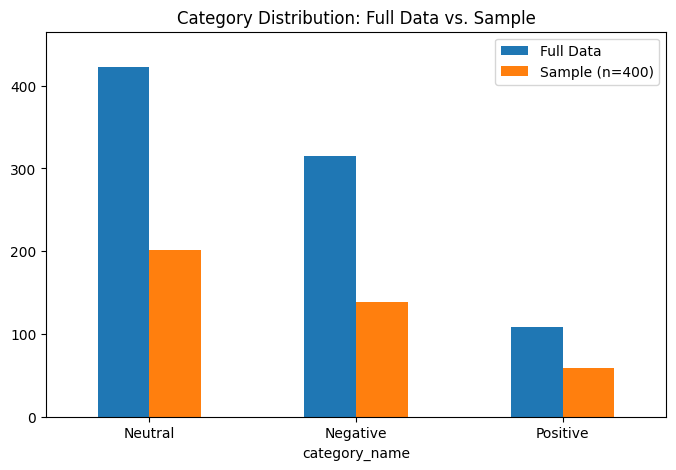

In [35]:
comparison_df = pd.concat([X_counts, X_sample_counts], axis=1).fillna(0)
comparison_df = comparison_df.astype(int)
print(comparison_df)
comparison_df.plot(
    kind='bar',
    title='Category Distribution: Full Data vs. Sample',
    ylim=[0, comparison_df.max().max() * 1.1], 
    rot=0,       
    fontsize=10,
    figsize=(8, 5)   
)

In [37]:
import nltk

nltk.download("punkt", quiet=True) 
X_new['text'] = X_new['text'].fillna('')

In [38]:
def tokenize_text(text):
    if isinstance(text, str):         
        return nltk.word_tokenize(text.lower()) 
    return []

X_new['unigrams'] = X_new['text'].apply(lambda x: tokenize_text(x))
print(X_new[0:4]['unigrams']) 
print(X_new.iloc[0]['unigrams'])

0                                 [calls, on, retards]
1    [stunt, as, in, like, why, did, they, even, ma...
2          [seeing, lots, of, red, in, the, ticker, .]
3    [vision, marine, technologies, inc., is, rewri...
Name: unigrams, dtype: object
['calls', 'on', 'retards']


In [39]:
from sklearn.feature_extraction.text import CountVectorizer

X_to_vectorize = X_new['text'].astype(str) 

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_to_vectorize) 

print(X_counts[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


In [44]:
vocab_size = len(count_vect.get_feature_names_out())
index_to_check = min(14887, vocab_size - 1)
print(f"idx: {index_to_check}")
if vocab_size > 0:
    example_feature = count_vect.get_feature_names_out()[index_to_check]
    print(f"{index_to_check} : '{example_feature}'")
else:
    print("不存在")


analyze = count_vect.build_analyzer()

test_phrase = "I am craving for a hawaiian pizza right now"
print(f"{analyze(test_phrase)}")

first_text = X_new['text'].iloc[0]
print(analyze(first_text)[:10])

idx: 4345
4345 : 'zsil'
['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']
['calls', 'on', 'retards']


In [45]:
print(X_counts.shape)
print(count_vect.get_feature_names_out()[0:10])
print(X_counts[0:5, 0:100].toarray())

(847, 4346)
['00' '000' '01378' '02' '027' '03' '06' '08' '10' '100']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 

In [48]:
feature_names = count_vect.get_feature_names_out()[:100]
nonzero_column_indices = X_counts[3].toarray().nonzero()[0] 
print(count_vect.get_feature_names_out()[nonzero_column_indices[1]])

00


[457, 342, 280, 275, 843]


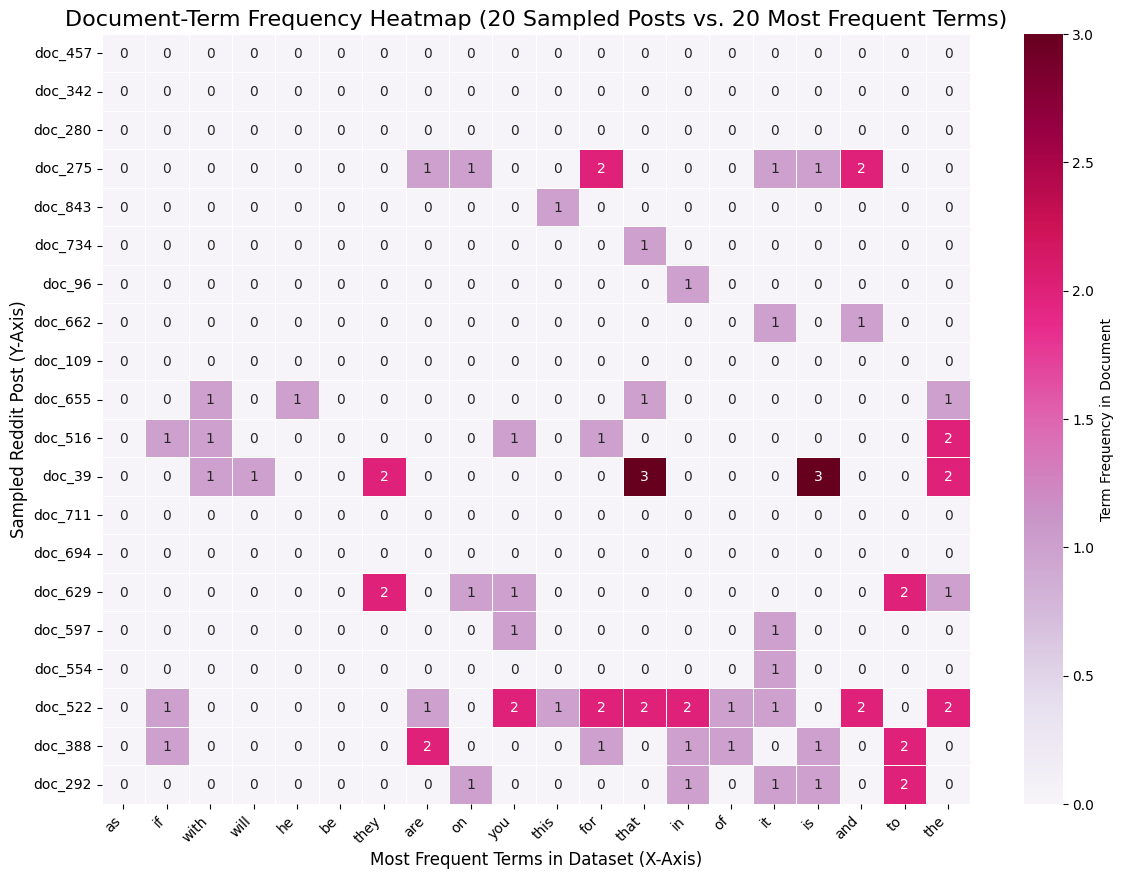

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import issparse 

X_sample_idx = X_new.sample(n=20, random_state=42).index 
sample_indices = [X_new.index.get_loc(i) for i in X_sample_idx]
print(sample_indices[:5])
term_frequencies = X_counts.sum(axis=0).A1
top_20_indices = np.argsort(term_frequencies)[-20:] 
plot_x = count_vect.get_feature_names_out()[top_20_indices]
plot_y = ["doc_"+ str(i) for i in X_sample_idx] 
plot_z = X_counts[np.ix_(sample_indices, top_20_indices)]
plot_z = plot_z.A 

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)


plt.figure(figsize=(14, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",          # 設定顏色映射
                 vmin=0,               # 設定顏色範圍最小值
                 vmax=plot_z.max(),    # 設定顏色範圍最大值
                 annot=True,           # 在單元格上顯示數值
                 fmt='d',              # 確保數值顯示為整數
                 linewidths=.5,        # 增加邊框以區分單元格
                 cbar_kws={'label': 'Term Frequency in Document'}) # 顏色條標籤

ax.set_title('Document-Term Frequency Heatmap (20 Sampled Posts vs. 20 Most Frequent Terms)', fontsize=16)
ax.set_xlabel('Most Frequent Terms in Dataset (X-Axis)', fontsize=12)
ax.set_ylabel('Sampled Reddit Post (Y-Axis)', fontsize=12)
plt.yticks(rotation=0) 
plt.xticks(rotation=45, ha='right') 
plt.show()

In [52]:
term_frequencies = X_counts.sum(axis=0).A1
first_term_frequency = term_frequencies[0]
first_term_name = count_vect.get_feature_names_out()[0]

C:\Users\USER\AppData\Local\Temp\ipykernel_34760\1581952791.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Term', y='Frequency', data=df_plot_sorted, palette="viridis")


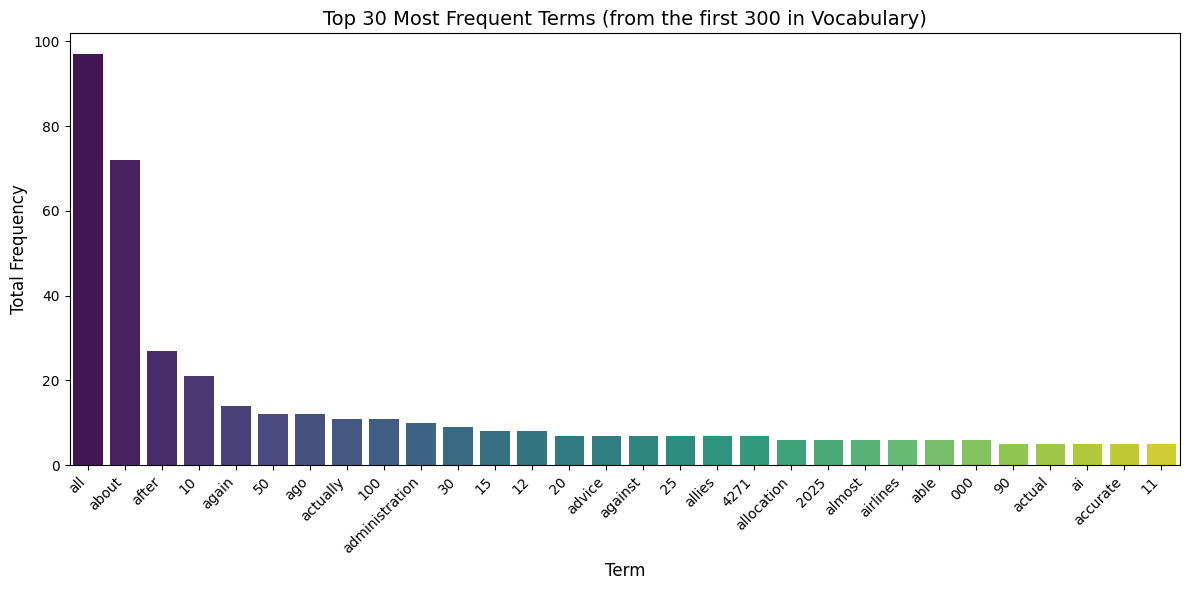

In [53]:
N_terms = 300
df_plot = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:N_terms], 
    'Frequency': term_frequencies[:N_terms]
})

df_plot_sorted = df_plot.sort_values(by='Frequency', ascending=False).head(30)

plt.figure(figsize=(12, 6))
sns.barplot(x='Term', y='Frequency', data=df_plot_sorted, palette="viridis")
plt.title(f'Top 30 Most Frequent Terms (from the first {N_terms} in Vocabulary)', fontsize=14)
plt.xlabel('Term', fontsize=12)
plt.ylabel('Total Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_term_frequencies_bar_chart.png')

C:\Users\USER\AppData\Local\Temp\ipykernel_34760\3166559369.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Term',
C:\Users\USER\AppData\Local\Temp\ipykernel_34760\3166559369.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(df_display['Term'], rotation=90)


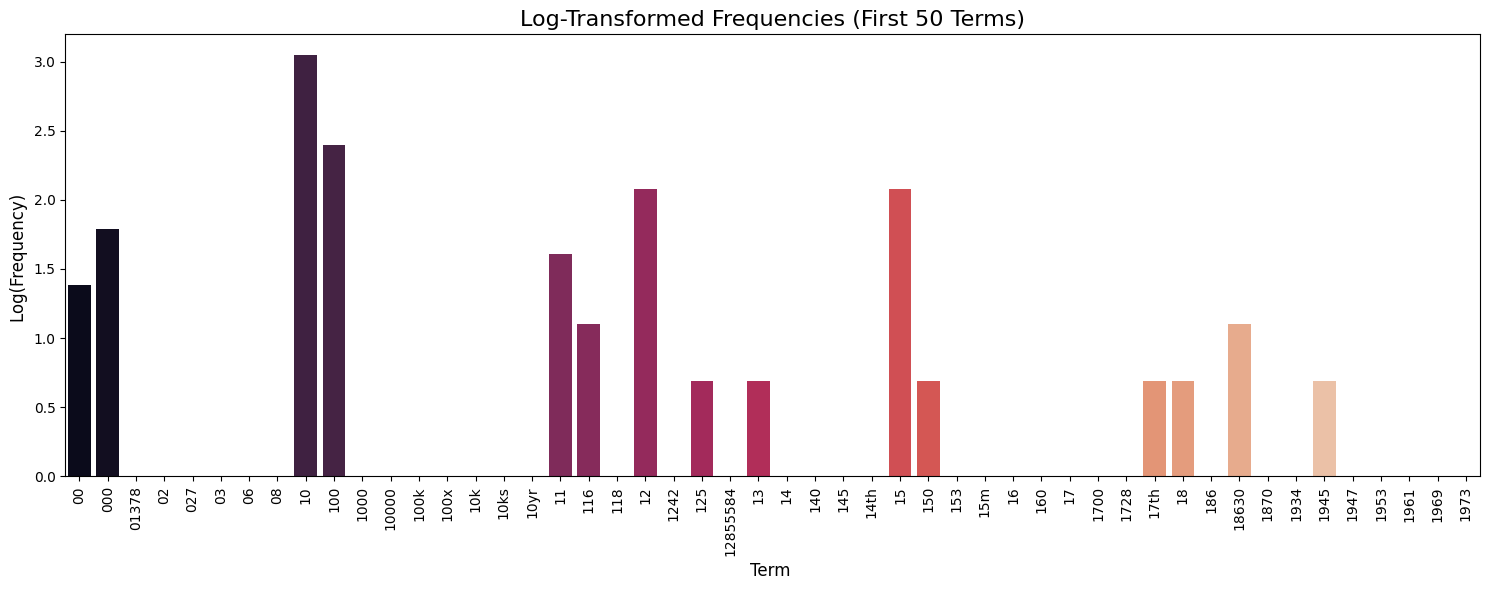

In [55]:
term_frequencies_log = np.log(term_frequencies)

N_terms = 300
df_log_plot = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:N_terms], 
    'Log_Frequency': term_frequencies_log[:N_terms]
})

N_display = 50 
df_display = df_log_plot.head(N_display)

plt.figure(figsize=(15, 6))
g = sns.barplot(x='Term',
                y='Log_Frequency',
                data=df_display,
                palette="rocket")

g.set_xticklabels(df_display['Term'], rotation=90)
g.set_title(f'Log-Transformed Frequencies (First {N_display} Terms)', fontsize=16)
g.set_xlabel('Term ', fontsize=12)
g.set_ylabel('Log(Frequency) ', fontsize=12)
plt.tight_layout()
plt.savefig('log_term_frequencies_bar_chart.png')

## Part3 
觀察在不同星期幾和一天中的時段，正面/負面/中性貼文的數量分佈

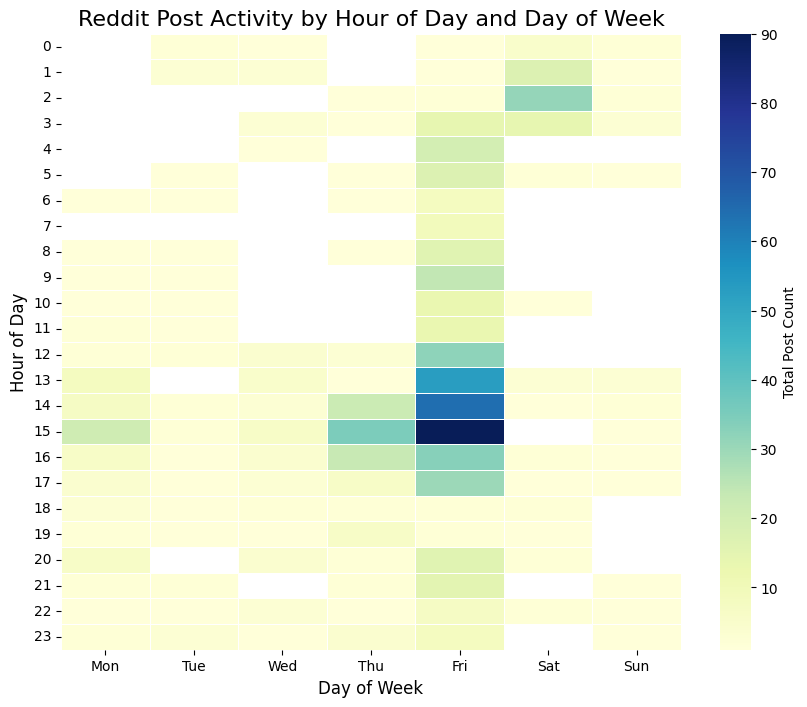

In [58]:
df_temp = X_new.copy()
df_temp['DayOfWeek'] = df_temp['datetime'].dt.dayofweek
df_temp['Hour'] = df_temp['datetime'].dt.hour

sentiment_pivot = df_temp.pivot_table(
    index='Hour', 
    columns='DayOfWeek', 
    values='category', 
    aggfunc='count'
)

day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sentiment_pivot.columns = day_names[:len(sentiment_pivot.columns)]

plt.figure(figsize=(10, 8))
sns.heatmap(
    sentiment_pivot, 
    cmap="YlGnBu", 
    annot=False, 
    fmt="d", 
    linewidths=.5, 
    cbar_kws={'label': 'Total Post Count'}
)
plt.title('Reddit Post Activity by Hour of Day and Day of Week', fontsize=16)
plt.ylabel('Hour of Day', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.yticks(rotation=0)
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here